# New book chapter 5 solutions

5.1 : 1. Write 

real  function  Trapezoid_Uniform( f, a, b, n) 


to  calculate  $\int_{a}^{b} f(x) \,dx$ using  the  composite  trapezoid rule  with  n  equal  subintervals. 

In [2]:
def trapezoid_uniform(f, a, b, n):
    h = (b - a) / n 
    sum_midpoints = sum(f(a + i * h) for i in range(1, n))  
    integral = (h / 2) * (f(a) + 2 * sum_midpoints + f(b))  
    return integral

Test case:

In [3]:
import math
f = lambda x: 1 / (x**2 + 1)  
result = trapezoid_uniform(f, 0, 1, 2)  
print(f"Approximate integral: {result:.6f}")

Approximate integral: 0.775000


5.1: 6.  Using  a numerical  integration  routine  in a  mathematical  
software  system,  find  an  approximate  value  for  the integral $\int_{0}^{1} sin(x)/x \,dx$ Compare  the approximate  value  
obtained  to  the  value  of Si(1)  if the  system  contains  this  
function.  Make a plot of the  integrand. 

In [8]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [6]:
def f(x):
    return np.sin(x) / x  

result = trapezoid_uniform(f, 0.01, 1, 1000)  # Avoid division by 0 at x=0

# Compare with Si(1) (Sine Integral Function)
Si_1 = sp.sici(1)[0]  # First value of sici() is Si(x), second is Ci(x)

print(f"Numerical Integral Approximation: {result:.6f}")
print(f"Si(1) from scipy.special: {Si_1:.6f}")
print(f"Absolute Error: {abs(result - Si_1):.6e}")

Numerical Integral Approximation: 0.936083
Si(1) from scipy.special: 0.946083
Absolute Error: 9.999969e-03


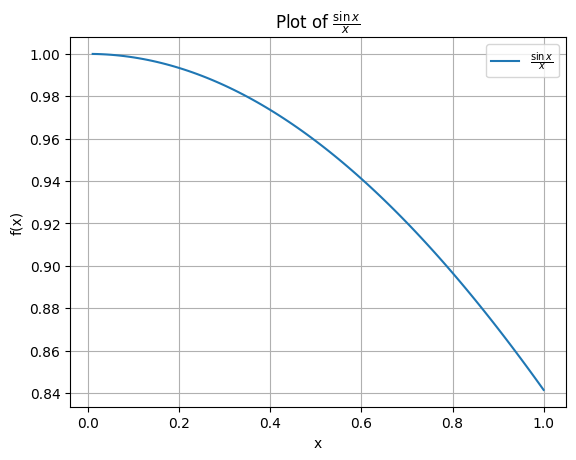

In [7]:
x_vals = np.linspace(0.01, 1, 100)  
y_vals = np.sin(x_vals) / x_vals

plt.plot(x_vals, y_vals, label=r'$\frac{\sin x}{x}$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of $\\frac{\\sin x}{x}$")
plt.legend()
plt.grid(True)
plt.show()


5.2: 1.  Compute  eight  rows  and  columns  in  the  Romberg  array for $\int_{2.19}^{1.3} sin(x)/x \,dx$

In [9]:

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    return integral * h

def romberg_integration(f, a, b, max_order):
    R = np.zeros((max_order, max_order))  

    for i in range(max_order):
        n = 2**i  
        R[i, 0] = trapezoidal_rule(f, a, b, n)

    for j in range(1, max_order):  
        for i in range(j, max_order): 
            R[i, j] = (4**j * R[i, j-1] - R[i-1, j-1]) / (4**j - 1)

    return R

In [10]:

def f1(x):
    return (1/x) * np.sin(x)


a1, b1 = 1.3, 2.19
a2, b2 = 0, 1
max_order = 8  

romberg_table_f1 = romberg_integration(f1, a1, b1, max_order)
result_f1 = romberg_table_f1[max_order - 1, max_order - 1]

print(f"Romberg Approximation for ∫[1.3,2.19] (x^(-1) sin(x)) dx ≈ {result_f1}")


Romberg Approximation for ∫[1.3,2.19] (x^(-1) sin(x)) dx ≈ 0.49997010275573506


5.2: 3. Test  the  Romberg  algorithm  on  a  bad  function,  such  as 
$\sqrt{x}$ on  [0,  1]. Why is it bad? 

In [11]:

def f2(x):
    return np.sqrt(x)

romberg_table_f2 = romberg_integration(f2, a2, b2, max_order)
result_f2 = romberg_table_f2[max_order - 1, max_order - 1]

print(f"Romberg Approximation for ∫[0,1] sqrt(x) dx ≈ {result_f2}")


Romberg Approximation for ∫[0,1] sqrt(x) dx ≈ 0.6666193221482851


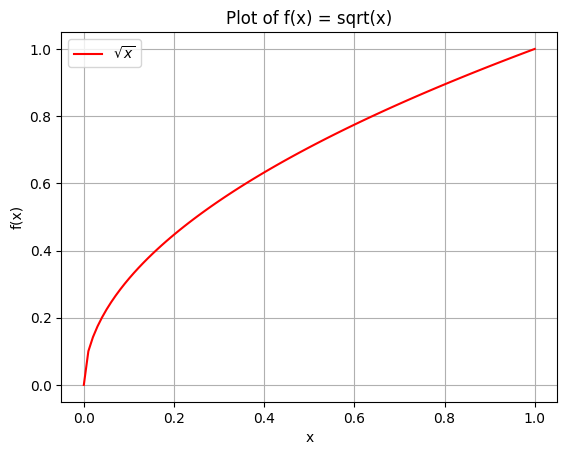

In [13]:
# Plot f2(x) = sqrt(x) to see why it's bad for Romberg
x_values = np.linspace(0, 1, 100)
y_values = np.sqrt(x_values)

plt.plot(x_values, y_values, label=r"$\sqrt{x}$", color="red")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = sqrt(x)")
plt.legend()
plt.grid()
plt.show()

It is a bad function because Romberg assumes smooth functions, but $\sqrt{x}$ is not smooth at $x=0$

5.3: 1. Find approximate values for the two integrals

$4 \int_{0}^{1} \frac{dx}{1 + x^2}, \quad 8 \int_{0}^{1/\sqrt{2}} \sqrt{1 - x^2 - x} \,dx$

Use recursive function *Simpson* with  

$\varepsilon = \frac{1}{2} \times 10^{-5}$  

and  

$level\_max = 4$

Sketch the curves of the integrand $f(x)$ in each case, and show how *Simpson* partitions the intervals.  

You may want to print the intervals at which new values are added to *simpson_result* in function *Simpson* and also to print values of $f(x)$ over the entire interval $[a, b]$ in order to sketch the curves.


In [23]:
def f1(x):
    return 1 / (1 + x**2)

def f2(x):
    return np.sqrt(1 - x**2) - x

epsilon = 0.5e-5  
level_max = 4 

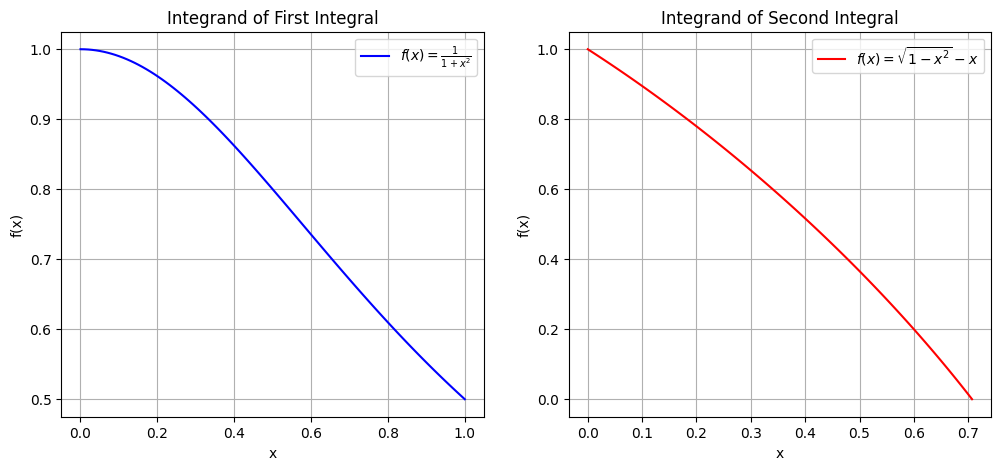

In [19]:
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1 / np.sqrt(2), 100)

plt.figure(figsize=(12, 5))

# Plot for f1(x)
plt.subplot(1, 2, 1)
plt.plot(x1, f1(x1), 'b', label=r'$f(x) = \frac{1}{1 + x^2}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integrand of First Integral')
plt.legend()
plt.grid()

# Plot for f2(x)
plt.subplot(1, 2, 2)
plt.plot(x2, f2(x2), 'r', label=r'$f(x) = \sqrt{1 - x^2 }- x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integrand of Second Integral')
plt.legend()
plt.grid()

plt.show()

In [21]:
def simpson_recursive(f, a, b, epsilon, level=0, level_max=4):
    c = (a + b) / 2
    h = (b - a) / 6
    S1 = h * (f(a) + 4*f(c) + f(b))

    d = (a + c) / 2
    e = (c + b) / 2
    S2 = h / 2 * (f(a) + 4*f(d) + 2*f(c) + 4*f(e) + f(b))

    print(f"Checking interval: [{a:.6f}, {b:.6f}] at level {level}")

    if level >= level_max or abs(S2 - S1) < 15 * epsilon:
        partition_points.append((a, b))  # Store partition for plotting
        return S2 + (S2 - S1) / 15
    else:
        left = simpson_recursive(f, a, c, epsilon / 2, level + 1, level_max)
        right = simpson_recursive(f, c, b, epsilon / 2, level + 1, level_max)
        return left + right

Checking interval: [0.000000, 1.000000] at level 0
Checking interval: [0.000000, 0.500000] at level 1
Checking interval: [0.000000, 0.250000] at level 2
Checking interval: [0.250000, 0.500000] at level 2
Checking interval: [0.500000, 1.000000] at level 1
Checking interval: [0.500000, 0.750000] at level 2
Checking interval: [0.750000, 1.000000] at level 2

--- Partition Points for First Integral ---
[(0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1)]
Checking interval: [0.000000, 0.707107] at level 0
Checking interval: [0.000000, 0.353553] at level 1
Checking interval: [0.353553, 0.707107] at level 1
Checking interval: [0.353553, 0.530330] at level 2
Checking interval: [0.530330, 0.707107] at level 2

--- Partition Points for Second Integral ---
[(0, np.float64(0.35355339059327373)), (np.float64(0.35355339059327373), np.float64(0.5303300858899106)), (np.float64(0.5303300858899106), np.float64(0.7071067811865475))]


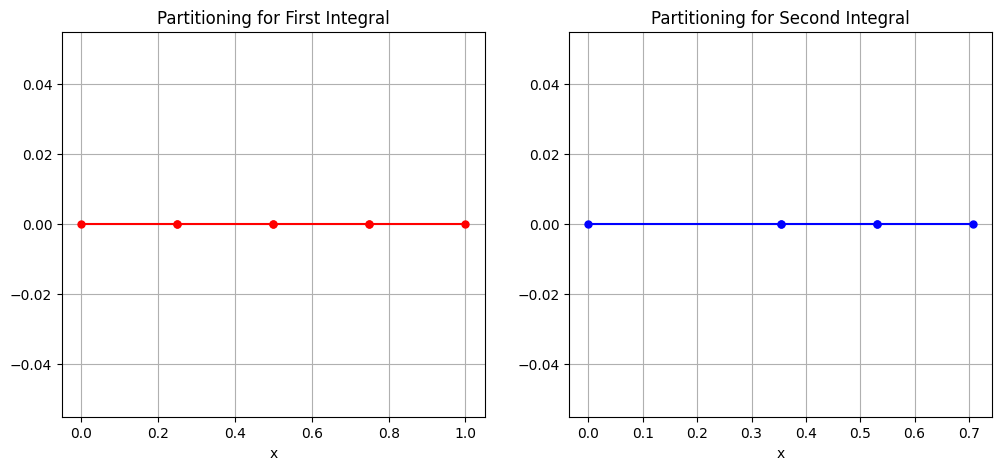


Approximate value of Integral 1: 3.141592661142563
Approximate value of Integral 2: 3.1415923143674847


In [ ]:
# Plot partition points
plt.figure(figsize=(12, 5))

partition_points = []
integral1 = 4 * simpson_recursive(f1, 0, 1, epsilon, level_max=level_max)
print("\n--- Partition Points for First Integral ---")
print(partition_points)

plt.subplot(1, 2, 1)
for a, b in partition_points:
    plt.plot([a, b], [0, 0], 'ro-', markersize=5)  
plt.title('Partitioning for First Integral')
plt.xlabel('x')
plt.grid()

partition_points = []
integral2 = 8 * simpson_recursive(f2, 0, 1 / np.sqrt(2), epsilon, level_max=level_max)
print("\n--- Partition Points for Second Integral ---")
print(partition_points)

plt.subplot(1, 2, 2)
for a, b in partition_points:
    plt.plot([a, b], [0, 0], 'bo-', markersize=5) 
plt.title('Partitioning for Second Integral')
plt.xlabel('x')
plt.grid()

plt.show()


print(f"\nApproximate value of Integral 1: {integral1}")
print(f"Approximate value of Integral 2: {integral2}")


5.3: 7. Consider the integral

$$
\int_{-1}^{1} \frac{1}{\sqrt{1 - x^2}} \,dx
$$

Because it has singularities at the endpoints of the interval $[-1, 1]$, closed rules cannot be used. Apply all of the Newton-Cotes open rules. Compare and explain these numerical results to the true solution, which is

$
\int_{-1}^{1} (1 - x^2)^{-1/2} \,dx = \arcsin x \Big|_{-1}^{1} = \pi.
$

In [24]:
def f(x):
    return 1 / np.sqrt(1 - x**2)

def midpoint_rule(a, b):
    mid = (a + b) / 2
    return 2 * (b - a) * f(mid)

def two_point_open_rule(a, b):
    h = (b - a) / 3
    x1, x2 = a + h, b - h
    return (3/2) * h * (f(x1) + f(x2))

def three_point_open_rule(a, b):
    h = (b - a) / 4
    x1, x2, x3 = a + h, a + 2*h, b - h
    return (4/3) * h * (2*f(x1) - f(x2) + 2*f(x3))

def four_point_open_rule(a, b):
    h = (b - a) / 5
    x1, x2, x3, x4 = a + h, a + 2*h, b - 2*h, b - h
    return (5/24) * h * (11*f(x1) + f(x2) + f(x3) + 11*f(x4))

def five_point_open_rule(a, b):
    h = (b - a) / 6
    x1, x2, x3, x4, x5 = a + h, a + 2*h, a + 3*h, b - 2*h, b - h
    return (6/20) * h * (11*f(x1) - 14*f(x2) + 26*f(x3) - 14*f(x4) + 11*f(x5))

a, b = -1, 1
true_value = np.pi

results = {
    "Midpoint Rule": midpoint_rule(a, b),
    "Two-Point Open Rule": two_point_open_rule(a, b),
    "Three-Point Open Rule": three_point_open_rule(a, b),
    "Four-Point Open Rule": four_point_open_rule(a, b),
    "Five-Point Open Rule": five_point_open_rule(a, b),
}

print("| Open Rule                | Approximate Value | Absolute Error |")
print("|-------------------------|------------------|---------------|")
for rule, value in results.items():
    error = abs(true_value - value)
    print(f"| {rule:<25} | {value:.6f}         | {error:.6f}      |")


| Open Rule                | Approximate Value | Absolute Error |
|-------------------------|------------------|---------------|
| Midpoint Rule             | 4.000000         | 0.858407      |
| Two-Point Open Rule       | 2.121320         | 1.020272      |
| Three-Point Open Rule     | 2.412535         | 0.729058      |
| Four-Point Open Rule      | 2.461770         | 0.679823      |
| Five-Point Open Rule      | 2.581761         | 0.559831      |
